In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
  
import pickle
import matplotlib.pyplot as plt
from matplotlib import cm
plt.rcParams['figure.figsize'] = (10, 10)

In [2]:

df = pd.read_csv('diabetes.csv') 

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

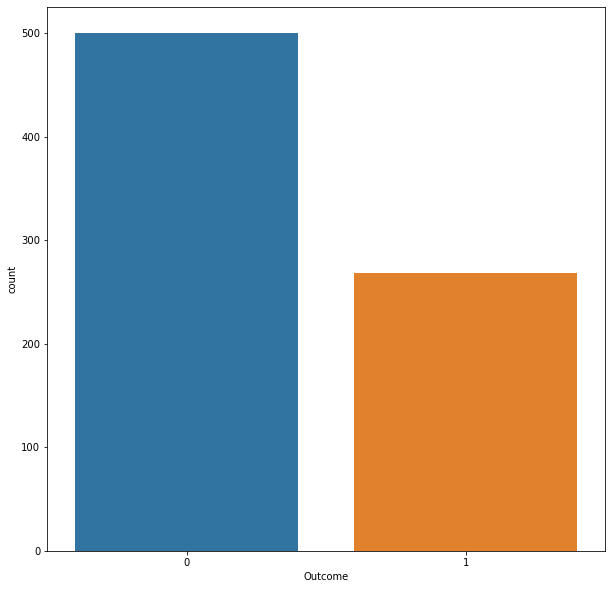

In [7]:
sns.countplot(x = 'Outcome',data = df)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
#df['Age'] = df['Age'].replace(0,df['Age'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
#df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#dividing dataset into features and outcome
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [13]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [14]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [15]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [16]:
#splitting training and testing 75%
from sklearn.model_selection import train_test_split

In [17]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.30,random_state=None)

In [18]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
746,1,147.0,94.0,41.000000,79.799479,49.3,0.358,27
480,3,158.0,70.0,30.000000,328.000000,35.5,0.344,35
452,0,91.0,68.0,32.000000,210.000000,39.9,0.381,25
721,1,114.0,66.0,36.000000,200.000000,38.1,0.289,21
576,6,108.0,44.0,20.000000,130.000000,24.0,0.813,35
...,...,...,...,...,...,...,...,...
318,3,115.0,66.0,39.000000,140.000000,38.1,0.150,28
221,2,158.0,90.0,20.536458,79.799479,31.6,0.805,66
679,2,101.0,58.0,17.000000,265.000000,24.2,0.614,23
293,1,128.0,48.0,45.000000,194.000000,40.5,0.613,24


In [19]:
Y_train

746    1
480    1
452    0
721    0
576    0
      ..
318    0
221    1
679    0
293    1
17     1
Name: Outcome, Length: 537, dtype: int64

In [20]:
#standardising data using standard scaler
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [21]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [22]:
X_train_std

array([[-0.87140315,  0.83788315,  1.8249927 , ...,  2.42260364,
        -0.31093094, -0.54639387],
       [-0.26565106,  1.19740836, -0.16347313, ...,  0.43750897,
        -0.35671465,  0.13182285],
       [-1.1742792 , -0.99242703, -0.32917861, ...,  1.0704377 ,
        -0.23571485, -0.71594805],
       ...,
       [-0.5685271 , -0.66558593, -1.15770604, ..., -1.18796711,
         0.52625687, -0.88550223],
       [-0.87140315,  0.21688505, -1.98623347, ...,  1.15674617,
         0.52298661, -0.80072514],
       [ 0.94585313, -0.46948126,  0.16793784, ..., -0.41119093,
        -0.65103849, -0.20728551]])

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [24]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [25]:
Y_pred=lr.predict(X_test_std)

In [26]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [27]:
Y_test

75     0
551    0
617    0
65     0
757    1
      ..
329    0
692    0
484    1
154    1
192    1
Name: Outcome, Length: 231, dtype: int64

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(Y_test,Y_pred) * 100

79.65367965367966

In [30]:
#dECITION TREE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy', random_state=0)

In [31]:
dt.fit(X_train_std,Y_train)
Y_pred=dt.predict(X_train_std)
accuracy_score(Y_train,Y_pred)*100

100.0

In [32]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
Y_pred=dt.predict(X_test_std)

In [34]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [35]:
Y_test

75     0
551    0
617    0
65     0
757    1
      ..
329    0
692    0
484    1
154    1
192    1
Name: Outcome, Length: 231, dtype: int64

In [36]:
accuracy_score(Y_test,Y_pred)*100

75.75757575757575

In [37]:
#support vector machine
classifier = svm.SVC(kernel='linear')

In [38]:
classifier.fit(X_train_std,Y_train)

SVC(kernel='linear')

In [39]:
Y_pred=classifier.predict(X_test_std)

In [40]:
Y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [41]:
Y_test

75     0
551    0
617    0
65     0
757    1
      ..
329    0
692    0
484    1
154    1
192    1
Name: Outcome, Length: 231, dtype: int64

In [42]:
accuracy_score(Y_test,Y_pred)*100

79.65367965367966

In [43]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  


In [44]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")


In [45]:
rf_model.fit(X_train_std,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [46]:
Y_pred=rf_model.predict(X_test_std)

In [47]:
Y_pred


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [48]:
Y_test

75     0
551    0
617    0
65     0
757    1
      ..
329    0
692    0
484    1
154    1
192    1
Name: Outcome, Length: 231, dtype: int64

In [49]:
accuracy_score(Y_test,Y_pred)*100

72.72727272727273

In [50]:
#kmeans
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X_train_std,Y_train)

KMeans(n_clusters=2, random_state=0)

In [51]:
Y_pred=KMeans_Clustering.predict(X_test_std)

In [52]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [53]:
Y_test

75     0
551    0
617    0
65     0
757    1
      ..
329    0
692    0
484    1
154    1
192    1
Name: Outcome, Length: 231, dtype: int64

In [54]:
accuracy_score(Y_test,Y_pred)*100

74.02597402597402

<AxesSubplot:>

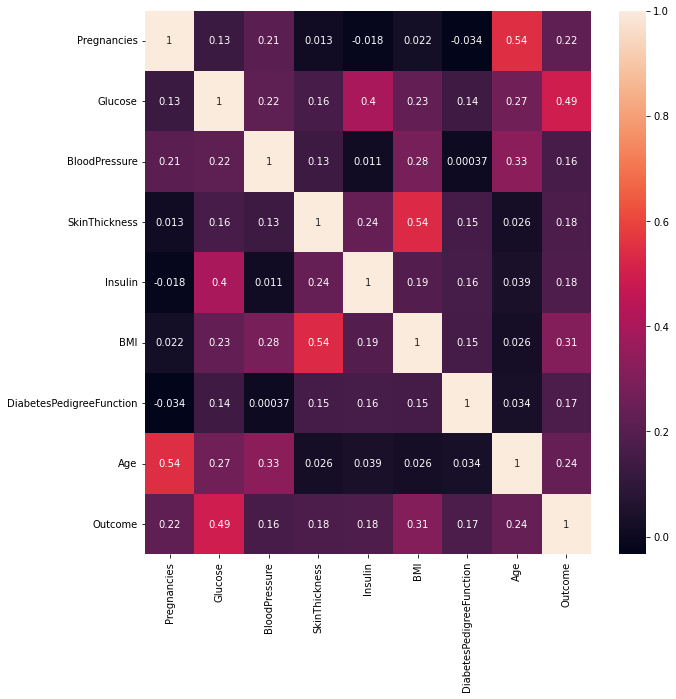

In [55]:
img=sns.heatmap(df.corr(), annot = True)
img

In [56]:
#new data with reduced features taken from heatmap
K = X.iloc[:, [0,1,2,5,7]].values
Z = df.iloc[:, 8].values

In [57]:
print(K)

[[  6.  148.   72.   33.6  50. ]
 [  1.   85.   66.   26.6  31. ]
 [  8.  183.   64.   23.3  32. ]
 ...
 [  5.  121.   72.   26.2  30. ]
 [  1.  126.   60.   30.1  47. ]
 [  1.   93.   70.   30.4  23. ]]


In [58]:
#new data splitting into test and train
K_train , K_test , Z_train , Z_test = train_test_split(K,Z,test_size=0.20,random_state=None)

In [59]:
#new data standardizing
std1=StandardScaler()
K_train_std=std1.fit_transform(K_train)
K_test_std=std1.transform(K_test)

In [60]:
#kmeans for new data reducing features to improve accuracy
KMeans_Clustering1 = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering1.fit(K_train_std,Z_train)

KMeans(n_clusters=2, random_state=0)

In [61]:
Y_pred=KMeans_Clustering1.predict(K_test_std)

In [62]:
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [63]:
accuracy_score(Z_test,Y_pred)*100

68.18181818181817

In [64]:
#testing new data with svm
classifier1 = svm.SVC(kernel='linear')

In [65]:
classifier1.fit(K_train_std,Z_train)

SVC(kernel='linear')

In [66]:
Y_pred=classifier1.predict(K_test_std)

In [67]:
Y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [68]:
#we got better results without reducing features so sticking to the previous data 
accuracy_score(Z_test,Y_pred)*100

81.81818181818183

In [69]:
lr1=LogisticRegression()
lr1.fit(K_train_std,Z_train)


LogisticRegression()

In [70]:
Y_pred=lr1.predict(K_test_std)


In [71]:

accuracy_score(Z_test,Y_pred) * 100

83.11688311688312

In [72]:
rf_model1 = RandomForestClassifier()
rf_model1.fit(K_train_std,Z_train)
Y_pred=lr1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

83.11688311688312

In [73]:
dt1=DecisionTreeClassifier()
dt1.fit(K_train_std,Z_train)
Y_pred=lr1.predict(K_test_std)
accuracy_score(Z_test,Y_pred) * 100

83.11688311688312

In [74]:
#predicting using best accuracy
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = std.transform(input_data_reshaped)
print(std_data)

prediction = rf_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.34010104  1.45888125  0.00223236 -0.83795526  0.54569356 -0.9578112
   0.43795972  1.4882563 ]]
[1]
The person is diabetic


c:\Users\atulv\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [76]:
pickle.dump(classifier, open('classifier.pkl', 'wb'))
pickle.dump(std,open('std.pkl','wb'))
pickle.dump(rf_model,open('randomforest.pkl','wb') )
pickle.dump(lr,open('logistic.pkl','wb') )
pickle.dump(dt,open('decition.pkl','wb') )
pickle.dump(classifier1, open('classifier1.pkl', 'wb'))
pickle.dump(std1,open('std1.pkl','wb'))
pickle.dump(rf_model1,open('randomforest1.pkl','wb') )
pickle.dump(lr1,open('logistic1.pkl','wb') )
pickle.dump(dt1,open('decition1.pkl','wb') )
